In [ ]:
import tensorflow as tf
import os
import pandas as pd
tf.random.set_seed(42)

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-04-21 16:55:41--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.133, 52.216.52.136, 52.216.214.192, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  5.81MB/s    in 2.2s    

2023-04-21 16:55:44 (5.81 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [ ]:
df = pd.read_csv(csv_path)


date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


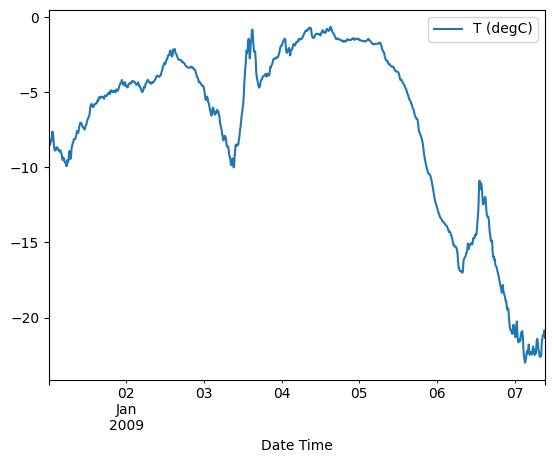

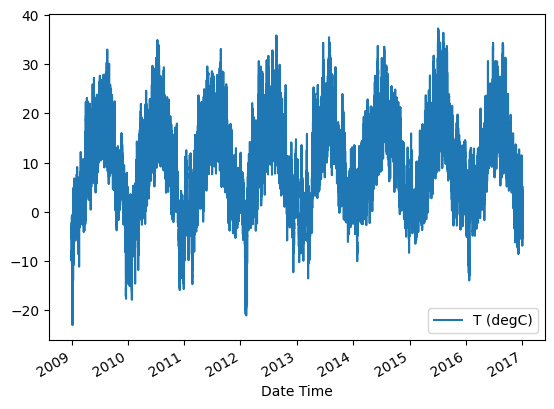

In [ ]:
# **Visualize the data over days**
plot_cols = ['T (degC)']
plot_features = df[plot_cols][:920]
plot_features.index = date_time[:920]
_ = plot_features.plot(subplots=True)



# **Visualize the data over years**
plot_cols = ['T (degC)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [ ]:
# Plotting the temperature timeseries
from matplotlib import pyplot as plt
temperature = df['T (degC)'] # extract out the temperature data


In [ ]:
# Convert data to np array
import numpy as np
raw_data = np.array(df) #raw_data is a np array
print(raw_data.shape)
# Q: how many features are there? A: 

(420551, 14)


0   -8.02
1   -8.41
2   -8.51
3   -8.31
4   -8.27
Name: T (degC), dtype: float64


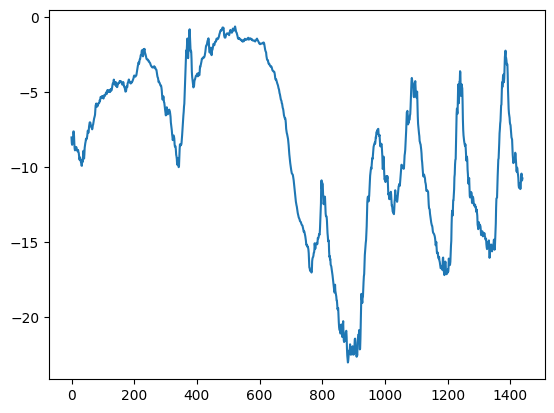

In [ ]:
# Plotting the first 10 days of the temperature timeseries
plt.plot(range(1440), temperature[:1440])
print(temperature[:5])

In [ ]:
# Compute the number of samples we'll use for each data split
num_train_samples = int(0.55 * len(raw_data))  
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples 
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 231303
num_val_samples: 105137
num_test_samples: 84111


In [ ]:
# Important:
mean = raw_data[:num_train_samples].mean(axis=0) 
std = raw_data[:num_train_samples].std(axis=0)    

raw_data -= mean  
raw_data /= std


In [ ]:
#Training set:
train_mean = raw_data[:num_train_samples].mean(axis=0)
train_std = raw_data[:num_train_samples].std(axis=0)


raw_data -= train_mean  
raw_data /= train_std


#Test set:
test_mean = raw_data[num_test_samples:].mean(axis=0)
test_std =  raw_data[num_test_samples:].std(axis=0)


In [ ]:
train_mean

array([ 7.74613629e-15,  4.91506110e-19,  1.69569608e-15, -1.16978454e-16,
        5.88209937e-16,  1.72518645e-16,  4.07950071e-17,  3.48969338e-17,
       -9.05354254e-16, -6.14382637e-16,  5.48914023e-15,  2.93674901e-16,
        4.66930804e-18,  1.53841412e-16])

In [ ]:
test_mean

array([ 0.11747061,  0.14862037,  0.1386157 ,  0.17609338, -0.00503266,
        0.12331869,  0.16369606,  0.05385647,  0.16140504,  0.16147052,
       -0.1162894 , -0.37494044, -0.27794366,  0.02053158])

In [ ]:
train_std

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
test_std

array([ 0.97632425,  0.93780283,  0.9412684 ,  0.92208551,  0.99661534,
        1.02418507,  1.01054747,  1.04637622,  1.01122749,  1.01061954,
        0.94194289, 47.45438758, 33.15105726,  0.98000238])

In [ ]:
# Instantiating datasets for training, validation, and testing
import numpy as np
from tensorflow import keras 

# Observations will be sampled at one data point per hour: we will only keep one data point out of 6.
sampling_rate = 6  # every 6th sample of the original sequence is a sample after an hour


sequence_length = 144  #Q: How many days worth data in a sequence? #A: 6 Days


delay = sampling_rate * (sequence_length + 24 - 1)

batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],          
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1] 
        #Q: What are the next 2 lines doing?
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.53
Test MAE: 2.59


In [ ]:
# **Training and evaluating a densely connected model**
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]


(None, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 14)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1984      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


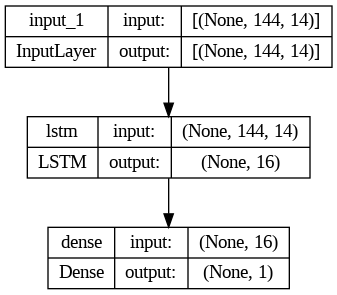

In [ ]:
print(outputs.shape)
model.summary()
plot_model(model, show_shapes=True)

In [ ]:


from keras.optimizers import RMSprop
rms_prop = RMSprop(learning_rate=0.1)

model.compile(optimizer= rms_prop , loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
901/901 [==============================] - 57s 57ms/step - loss: 11.2318 - mae: 2.6023 - val_loss: 10.4922 - val_mae: 2.5228
Epoch 2/50
901/901 [==============================] - 48s 53ms/step - loss: 10.3826 - mae: 2.5138 - val_loss: 10.7115 - val_mae: 2.5394
Epoch 3/50
901/901 [==============================] - 56s 62ms/step - loss: 10.0817 - mae: 2.4825 - val_loss: 11.3520 - val_mae: 2.6277
Epoch 4/50
901/901 [==============================] - 56s 62ms/step - loss: 9.9651 - mae: 2.4697 - val_loss: 13.1391 - val_mae: 2.8486
Epoch 5/50
901/901 [==============================] - 48s 53ms/step - loss: 9.7607 - mae: 2.4465 - val_loss: 12.4047 - val_mae: 2.7672
Epoch 6/50
901/901 [==============================] - 48s 54ms/step - loss: 10.0502 - mae: 2.4776 - val_loss: 11.0795 - val_mae: 2.6026
Epoch 7/50
901/901 [==============================] - 48s 53ms/step - loss: 10.4905 - mae: 2.5408 - val_loss: 11.6889 - val_mae: 2.6825
Epoch 8/50
901/901 [==============================

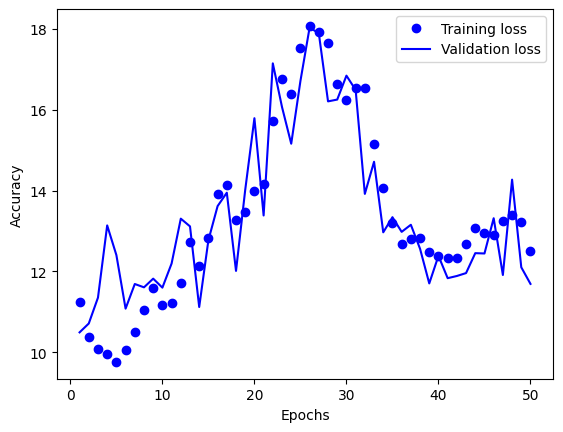

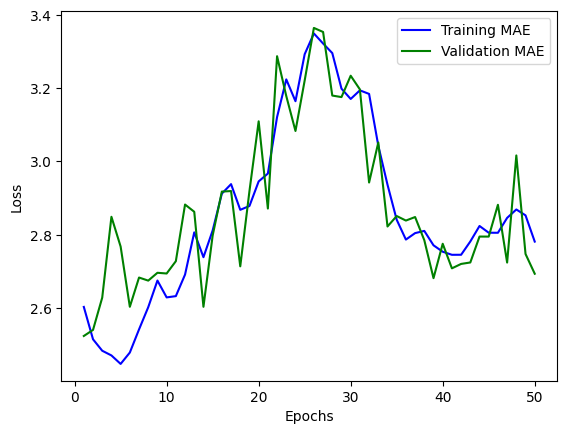

In [ ]:
data = pd.DataFrame(history.history)

plt.plot(range(1,len(data)+1),data['loss'],'bo',label="Training loss")
plt.plot(range(1,len(data)+1),data['val_loss'],'b',label="Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.figure()


#plt.plot(range(1,len(data)+1),data['loss'],'bo',label="Training loss")
plt.plot(range(1,len(data)+1),data['mae'],'b',label="Training MAE")
plt.plot(range(1,len(data)+1),data['val_mae'],'g',label="Validation MAE")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Under LSTM
#--------------- Validation MAE: 17.34
#----------------Test MAE: 18.82
# Under common baseline
#---------------Validation MAE: 18.29
#---------------Test MAE: 19.31